In [ ]:
!pip install kaggle

In [ ]:
!mkdir .kaggle

In [ ]:
import json
token = {"username":"kaiwalyashukla","key":"31dd8e0c34b6c43de790a2cdfb48fd31"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [ ]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 97% 320M/330M [00:03<00:00, 58.8MB/s]
100% 330M/330M [00:04<00:00, 82.7MB/s]


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
   
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
   
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 156800)           

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255,rotation_range=90,width_shift_range=0.3,height_shift_range=0.3,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
!unzip /content/{/content}/datasets/ashishjangra27/face-mask-12k-images-dataset/face-mask-12k-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1870.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/content/Face Mask Dataset/Train',  
        target_size=(300, 300),  
        batch_size=100,
        class_mode='binary')    
validation_generator = validation_datagen.flow_from_directory(
        '/content/Face Mask Dataset/Validation',  
        target_size=(300, 300),  
        batch_size=100,

        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epochs,logs={}):
        if(logs.get('accuracy')>0.90):
            print("\n Accuracy over 90%")
            self.model.stop_training =True
callback = myCallback()

In [ ]:
model.fit_generator(
      train_generator,
      steps_per_epoch=100,  
      epochs=15,
      validation_data = validation_generator,
      callbacks=[callback],
      verbose=2)

Epoch 1/15

 Accuracy over 90%
100/100 - 262s - loss: 0.2241 - accuracy: 0.9115 - val_loss: 0.1420 - val_accuracy: 0.9513


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(classes[0]*100)
    print(fn + " is without mask")
  else:
    print(fn + " is with mask")

Saving file-20200519-152327-1dts6e7.jpg to file-20200519-152327-1dts6e7.jpg
Saving smile-GettyImages-882495390-crop.jpg to smile-GettyImages-882495390-crop.jpg
Saving the-ultimate-makeup-tutorial-eyeshadow-lipstick-face-hero-mudc-091118_r2.jpg to the-ultimate-makeup-tutorial-eyeshadow-lipstick-face-hero-mudc-091118_r2.jpg
Saving eminence-organics-acne-face-mapping.jpg to eminence-organics-acne-face-mapping.jpg
Saving photo-1568967729548-e3dbad3d37e0.jpeg to photo-1568967729548-e3dbad3d37e0.jpeg
Saving 5ece81d1988ee31c1d1ff024.jpeg to 5ece81d1988ee31c1d1ff024.jpeg
[0.]
file-20200519-152327-1dts6e7.jpg is with mask
[1.]
[100.]
smile-GettyImages-882495390-crop.jpg is without mask
[1.]
[100.]
the-ultimate-makeup-tutorial-eyeshadow-lipstick-face-hero-mudc-091118_r2.jpg is without mask
[0.]
eminence-organics-acne-face-mapping.jpg is with mask
[1.]
[100.]
photo-1568967729548-e3dbad3d37e0.jpeg is without mask
[0.]
5ece81d1988ee31c1d1ff024.jpeg is with mask


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in true_divide


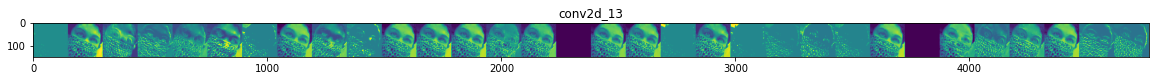

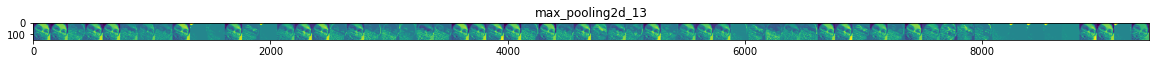

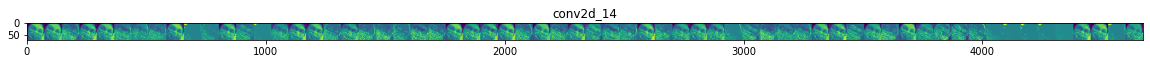

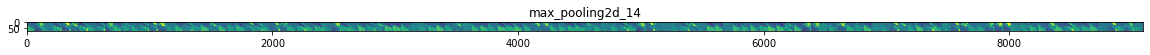

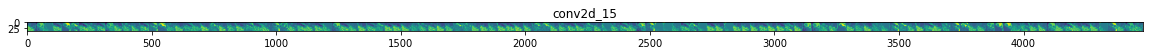

In [ ]:
import numpy as np
import random
import os
from   tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
base_dir = '/content/Face Mask Dataset'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')

# Directory with our training cat/dog pictures
train_mask_dir = os.path.join(train_dir, 'WithMask')
train_wmask_dir = os.path.join(train_dir, 'WithoutMask')
train_mask_fnames = os.listdir(  train_mask_dir)
train_wmask_fnames = os.listdir( train_wmask_dir )


# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
mask_img_files = [os.path.join(train_mask_dir, f) for f in train_mask_fnames]
wmask_img_files = [os.path.join(train_wmask_dir, f) for f in train_wmask_fnames]

img_path = random.choice(mask_img_files + wmask_img_files)
img = load_img(img_path, target_size=(300, 300))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 